# Corneal OCT quantification 
## For "Haze" detection

In [1]:
from image_OCT import *
from image_Quantification import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import math 

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
def plot_treatment(im):
	plt.figure()
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	plt.figure()
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")

def im_plot(im,type='OCT_brut'):
	plt.figure()
	if type=='OCT_brut':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT_cut':
		plt.imshow(im.OCT_cut,cmap="gray",aspect="auto")
	elif type=='OCT_flat':
		plt.imshow(im.OCT_flat,cmap="gray",aspect="auto")
	else:
		print("Type not recognize")


## Example of profile extraction and fitting

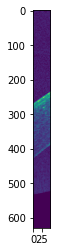

In [7]:
plt.imshow(im.OCT[:,10:60])

In [5]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()
moving=True

plt.figure(figsize=(10,10))
im_Q=image_Quantification(im,plot=True,moving=moving)

if not moving:
	plt.savefig(savefold+"profile"+extension)

	plt.figure(figsize=(10,10))
	plot_treatment(im)
	plt.savefig(savefold+"profile1"+extension)

	plt.figure()
	plot_profile(im,im_Q)
	plt.savefig(savefold+"profile2"+extension)

	plt.figure()
	plot_quantification(im_Q)
	plt.savefig(savefold+"profile3"+extension)
else:
    print(im_Q.parameters)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)

{'PeakWidth': 1.3270251557812138, 'Sigma': 0.22931014276362474, 'DataCov': 0.005132231672256575, 'Mean': 0.4879239620884184, 'MSE': 0.041697303963507425, 'AreaRatio': 0.01056051401110692}


<Figure size 720x720 with 0 Axes>

## Multi-image treatment

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\HAZE\haze 5.jpg


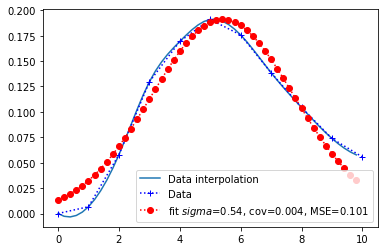

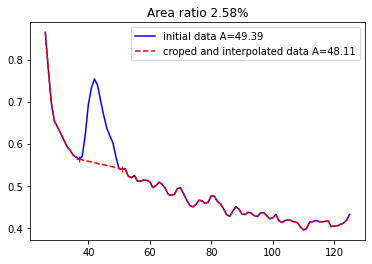

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\Healthy\80553_DUMFAU_OD.jpg


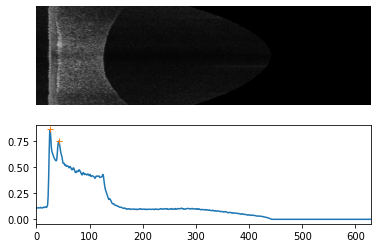

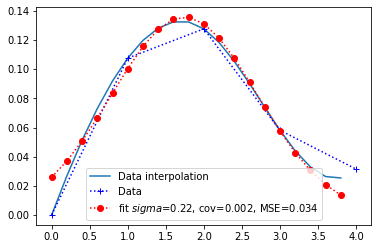

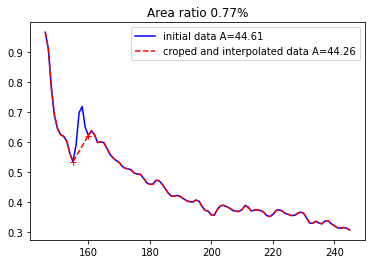

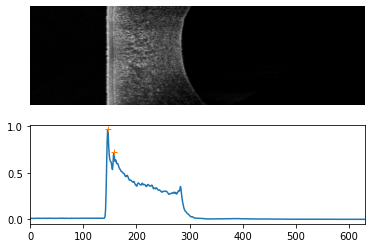

In [20]:
i=4
im=image_OCT(os.path.join(repertory_haze, files_haze[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True)
plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

plt.figure()
i=4
im=image_OCT(os.path.join(repertory_healthy, files_healthy[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True)
plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')


In [32]:
repertory_haze=os.path.join(dirname, 'Data','HAZE')
repertory_healthy=os.path.join(dirname, 'Data','Healthy')

files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification=[]
i=0
i_list_haze=[]

moving=True
for haze in files_haze:
	i+=1
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification(im,plot=False,moving=moving)
		parameters=im_Q.parameters
		parameters["Healthy"]=0
		parameters["Origin"]=haze[:-4]
		quantification.append(parameters)
		print(i,":",haze)
		i_list_haze.append(i)
	except:
		print("Error with: "+haze+" image #"+str(i))

i=0
i_list_healthy=[]
for healthy in files_healthy:
	i+=1
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		im_Q=image_Quantification(im,plot=False,moving=moving)
		parameters=im_Q.parameters
		parameters["Healthy"]=1
		parameters["Origin"]=healthy[:-4]
		quantification.append(parameters)
		print(i,":",healthy)
		i_list_healthy.append(i)
	except:
		print("Error with: "+healthy+" image #"+str(i))

n=len(quantification)
data=pd.DataFrame(quantification,index=range(n))

1 : haze 1.jpg
2 : haze 2.jpg
Error with: haze 3.jpg image #3
4 : haze 4.jpg
5 : haze 5.jpg
Error with: haze 6.jpg image #6
1 : 23923_BOULIS_OD.jpg
2 : 79296_BESNIC_OD.jpg
3 : 80552_CORANT_OD.jpg
4 : 80552_CORANT_OS.jpg
5 : 80553_DUMFAU_OD.jpg
6 : 80553_DUMFAU_OS.jpg
7 : 80608_REZAZK_OD.jpg
Error with: 80608_REZAZK_OS.jpg image #8
9 : 81225_GOLDIM_OD.jpg
10 : 81225_GOLDIM_OS.jpg
11 : 81232_VILMAE_OD.jpg
12 : 81232_VILMAE_OS.jpg


In [33]:
data

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,1.846296,0.481750,0.006810,1.056262,0.129663,0.025454,0,haze 1
1,1.850995,0.461225,0.007569,1.030784,0.131931,0.027720,0,haze 2
2,1.846296,0.500128,0.004007,1.051109,0.105178,0.013685,0,haze 4
3,2.313744,0.541296,0.003635,1.251258,0.100510,0.025799,0,haze 5
4,1.384722,0.295020,0.002348,0.681423,0.062446,0.014643,1,23923_BOULIS_OD
5,0.923148,0.235862,0.005292,0.552624,0.052264,0.006992,1,79296_BESNIC_OD
6,0.923148,0.264362,0.006341,0.572700,0.062489,0.005714,1,80552_CORANT_OD
7,0.923148,0.237248,0.003401,0.481308,0.043542,0.007326,1,80552_CORANT_OS
8,0.923148,0.221031,0.001763,0.402612,0.034299,0.007672,1,80553_DUMFAU_OD
9,0.923148,0.192516,0.002737,0.384025,0.032868,0.007715,1,80553_DUMFAU_OS


C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\csoub\AppData\Local\Temp/ipykernel_18980/291543474.py:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\csoub\AppData\Local\Temp/ipykernel_18980/29154347

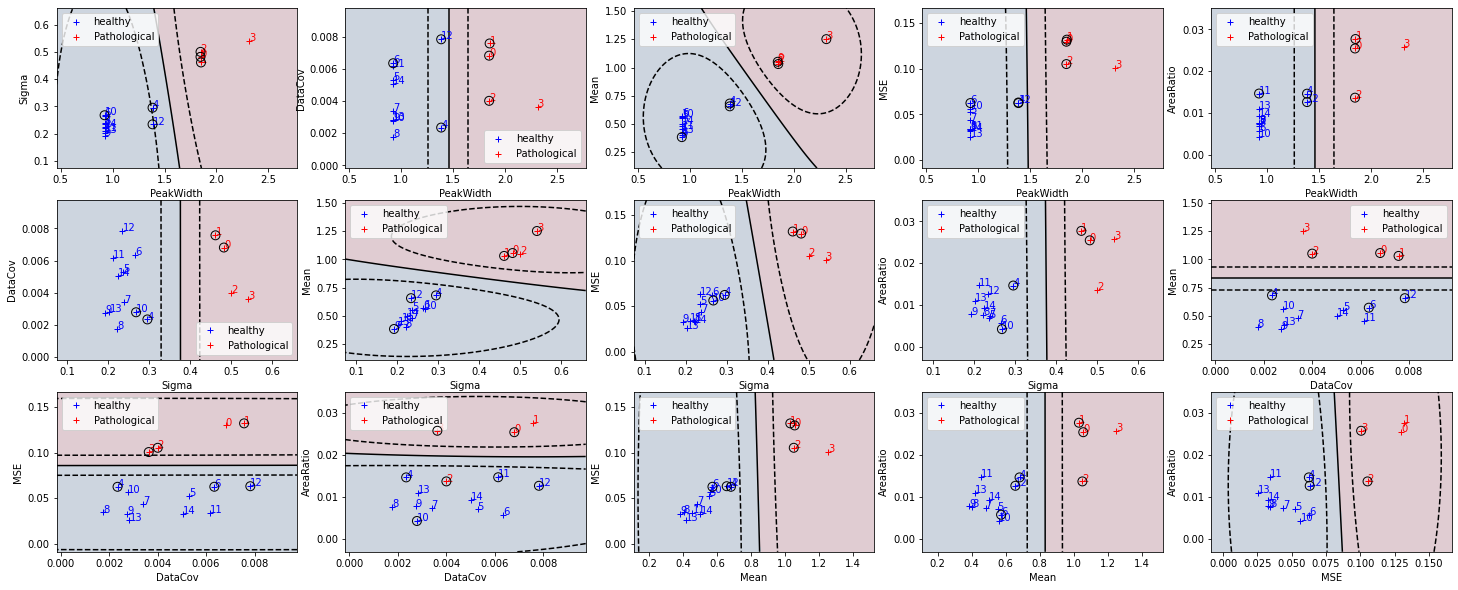

In [162]:

variable=data.columns[:-2]
k=len(variable)
comb=math.comb(k,2)
	
plt.figure(figsize=(25,10))
nline=3
ncol=comb//nline+int(comb/nline-comb//nline+0.5)
l=0
for i in range(k-1):
    for j in range(i+1,k):
        l+=1
        plt.subplot(nline,ncol,l)
        x_class1=data[variable[i]][data["Healthy"]==1]
        y_class1=data[variable[j]][data["Healthy"]==1]
        x_class0=data[variable[i]][data["Healthy"]==0]
        y_class0=data[variable[j]][data["Healthy"]==0]
        plt.plot(x_class1.T,y_class1.T,"b+",label="healthy")
        plt.plot(x_class0.T,y_class0.T,"r+",label="Pathological")
        for m in range(len(data)):
            if data["Healthy"][m]==1:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="blue")
            else:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="red")
        X=data[variable[i]]
        Y=data[variable[j]]
        Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
        C=np.array([data["Healthy"].to_numpy()]).T
        clf = svm.SVC()
        clf.fit(Z, C)
        x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
        x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
        y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
        y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
        plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
        plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5])
        plt.xlabel(variable[i])
        plt.ylabel(variable[j])
        plt.legend()
        

## Variable study

<AxesSubplot:>

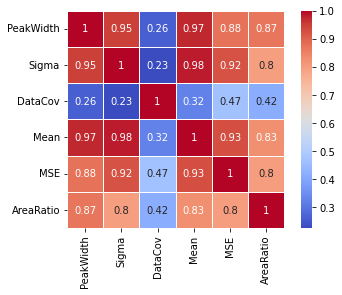

In [191]:
import seaborn as sns
data_copy=data.drop(["Healthy","Origin"],axis=1)
cor=data_copy.corr()
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )

## SVM classifier
### On PCA axis

C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\csoub\AppData\Local\Temp/ipykernel_18980/3009505167.py:50: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2)


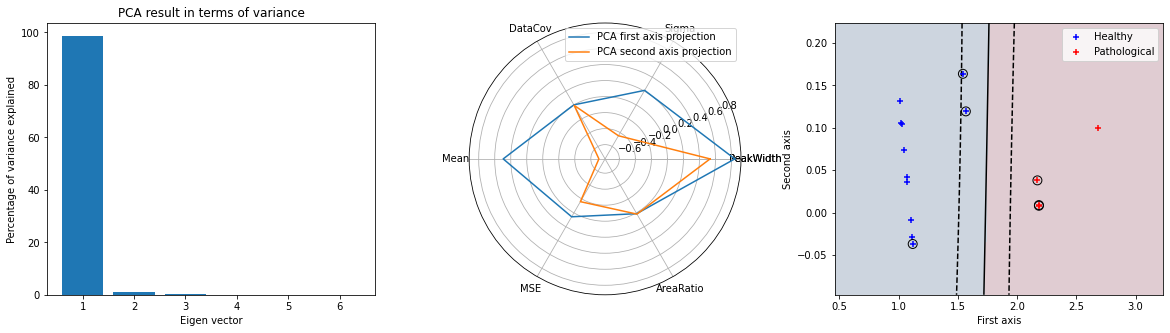

In [161]:
from sklearn.decomposition import PCA
from sklearn import svm

data_copy=data.drop(["Healthy","Origin"],axis=1)
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(np.arange(1,K+1,1),pca.explained_variance_ratio_*100)
plt.xlabel('Eigen vector')
plt.ylabel('Percentage of variance explained')
plt.title("PCA result in terms of variance")
plt.subplot(132,polar=True)
categories = data_copy.columns
categories = [*categories, categories[0]]
axis1= pca.components_[0]
axis1 = [*axis1, axis1[0]]
axis2= pca.components_[1]
axis2 = [*axis2, axis2[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(axis1))
plt.plot(label_loc, axis1, label='PCA first axis projection')
plt.plot(label_loc, axis2, label='PCA second axis projection')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
clf = svm.SVC()
clf.fit(Z, C)
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.subplot(133)
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5])
plt.xlabel("First axis")
plt.ylabel("Second axis")
plt.legend()

pca = PCA(n_components=2)
data_proj=pca.fit(data_copy,data["Healthy"])

### Leave one out test

In [227]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

loo = LeaveOneOut()
loo.get_n_splits(Z)
result=[]
result_pred=[]
conf=np.zeros((2,2))
for train_index, test_index in loo.split(X):
	print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = Z[train_index], Z[test_index]
	y_train, y_test = C[train_index], C[test_index]
	clf = svm.SVC()
	clf.fit(X_train, y_train)
	y_predict=clf.predict(X_test)
	result.append(y_test.ravel()[0])
	result_pred.append(y_predict.ravel()[0])
	if y_predict[0]==y_test[0][0] and y_test[0][0]==0:
		conf[0,0]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==1:
		print(y_predict,y_test)
		conf[0,1]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==0:
		conf[1,0]+=1
	elif y_predict[0]==y_test[0][0] and y_test[0][0]==1:
		conf[1,1]+=1
# print(result_pred)
# print(result)
# print(result_pred==result)
# ytrain=data["Healthy"].to_numpy()
print(conf)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] TEST: [14]
[[ 4.  0.]
 [ 0. 11.]]


C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Python39\lib\

## Random Forest

In [233]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)

rf.fit(data_copy, data["Healthy"])
predictions = rf.predict(data_copy)
# confusion_matrix(predictions, data["Healthy"])
predictions=(predictions+0.5).astype(int)
ytrain=data["Healthy"].to_numpy()

print(confusion_matrix(predictions,ytrain))
print(predictions)
print(ytrain)


[[ 4  0]
 [ 0 11]]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Relative Importance')

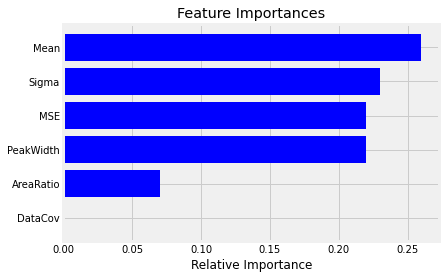

In [235]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')